           Country   TotalSales
36  United Kingdom  8187806.364


C:\Users\bhave\AppData\Local\Temp\ipykernel_8220\2160074417.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='TotalSales', y='Country', palette='viridis')


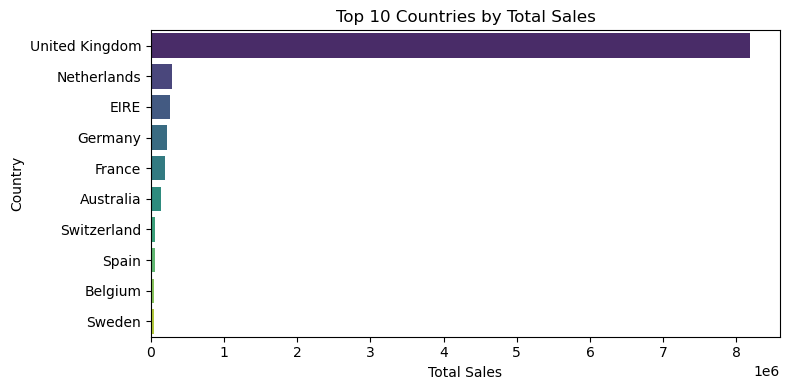

Loaded with latin-1, computed totals, and plotted top 10 countries.


In [5]:
# Try reading the CSV using latin-1 encoding (handles £ and many extended chars), then compute total sales by country.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = './stock market.csv'
df_sales = pd.read_csv(csv_path, encoding='latin-1')

# Ensure numeric for Quantity and UnitPrice, then compute TotalSales
df_sales['Quantity'] = pd.to_numeric(df_sales['Quantity'], errors='coerce')
df_sales['UnitPrice'] = pd.to_numeric(df_sales['UnitPrice'], errors='coerce')
df_sales['TotalSales'] = df_sales['Quantity'] * df_sales['UnitPrice']

# Aggregate by Country
country_sales = df_sales.groupby('Country', as_index=False)['TotalSales'].sum().sort_values('TotalSales', ascending=False)

print(country_sales.head(1))

# Plot top 10 countries
top10 = country_sales.head(10)
plt.figure(figsize=(8,4))
sns.barplot(data=top10, x='TotalSales', y='Country', palette='viridis')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print('Loaded with latin-1, computed totals, and plotted top 10 countries.')

The first table shows the country with the highest aggregate sales.
The bar chart shows the top 10 countries by total sales for context.

2.Which 10 products are sold the most (by quantity)?

                             Description  Quantity
4009   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1866             JUMBO BAG RED RETROSPOT     47363
244        ASSORTED COLOUR BIRD ORNAMENT     36381
2740                      POPCORN HOLDER     36334
2395     PACK OF 72 RETROSPOT CAKE CASES     36039
3918  WHITE HANGING HEART T-LIGHT HOLDER     35317
2803                  RABBIT NIGHT LIGHT     30680
2161             MINI PAINT SET VINTAGE      26437
2361          PACK OF 12 LONDON TISSUES      26315
2393  PACK OF 60 PINK PAISLEY CAKE CASES     24753


C:\Users\bhave\AppData\Local\Temp\ipykernel_8220\718455970.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y=product_col, palette='magma')


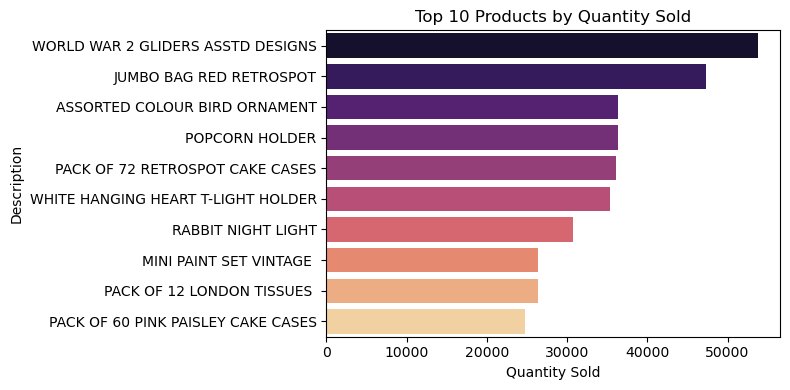

Computed top 10 products by quantity and plotted the results.


In [6]:
# Load the CSV (reusing latin-1 which worked), then compute top 10 products by total Quantity sold.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = './stock market.csv'
df_sales = pd.read_csv(csv_path, encoding='latin-1')

# Ensure Quantity numeric and handle product column name variations
qty = pd.to_numeric(df_sales['Quantity'], errors='coerce')
df_sales['Quantity'] = qty

# Try common product/description column names
product_col = None
for col in ['Product', 'Description', 'Item', 'StockCode', 'ProductName']:
    if col in df_sales.columns:
        product_col = col
        break

if product_col is None:
    product_col = df_sales.columns[0]

top_products = df_sales.groupby(product_col, as_index=False)['Quantity'].sum().sort_values('Quantity', ascending=False).head(10)

print(top_products)

plt.figure(figsize=(8,4))
sns.barplot(data=top_products, x='Quantity', y=product_col, palette='magma')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel(product_col)
plt.tight_layout()
plt.show()

print('Computed top 10 products by quantity and plotted the results.')

The table lists the top 10 products ranked by total quantity sold.
The bar chart visualizes the same ranking so you can see relative differences at a glance.

3.Which month had the highest revenue?

   YearMonth    Revenue
16   2011-07  404720.82


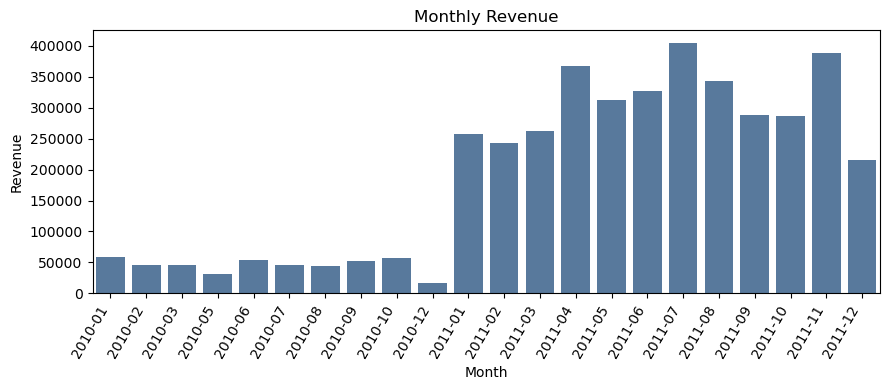

Computed monthly revenue and displayed top month plus trend.


In [7]:
# Compute monthly revenue (Quantity * UnitPrice) and identify the highest revenue month, with a bar chart.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = './stock market.csv'
df_rev = pd.read_csv(csv_path, encoding='latin-1')

# Parse dates and compute revenue
df_rev['InvoiceDate'] = pd.to_datetime(df_rev['InvoiceDate'], errors='coerce', dayfirst=True)
df_rev['Quantity'] = pd.to_numeric(df_rev['Quantity'], errors='coerce')
df_rev['UnitPrice'] = pd.to_numeric(df_rev['UnitPrice'], errors='coerce')
df_rev['Revenue'] = df_rev['Quantity'] * df_rev['UnitPrice']

# Drop invalid rows
df_rev = df_rev.dropna(subset=['InvoiceDate', 'Revenue'])

# Group by month
df_rev['YearMonth'] = df_rev['InvoiceDate'].dt.to_period('M').astype(str)
monthly_rev = df_rev.groupby('YearMonth', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False)

# Show the top month and plot the monthly trend
print(monthly_rev.head(1))

plt.figure(figsize=(9,4))
ordered = df_rev.groupby('YearMonth', as_index=False)['Revenue'].sum().sort_values('YearMonth')
sns.barplot(data=ordered, x='YearMonth', y='Revenue', color='#4C78A8')
plt.xticks(rotation=60, ha='right')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

print('Computed monthly revenue and displayed top month plus trend.')

Briefly: The table shows the top month by revenue; the chart shows how revenue evolved across 
months. Done: computed monthly revenue from Quantity × UnitPrice using the InvoiceDate month.


4.Who are the top 10 customers by total spending?

      CustomerID    Revenue
1703     14646.0  279489.02
4233     18102.0  256438.49
3758     17450.0  187482.17
1895     14911.0  132572.62
55       12415.0  123725.45
1345     14156.0  113384.14
3801     17511.0   88125.38
3202     16684.0   65892.08
1005     13694.0   62653.10
2192     15311.0   59419.34


C:\Users\bhave\AppData\Local\Temp\ipykernel_8220\1521952786.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cust_spend, x='Revenue', y=cust_col, palette='crest')


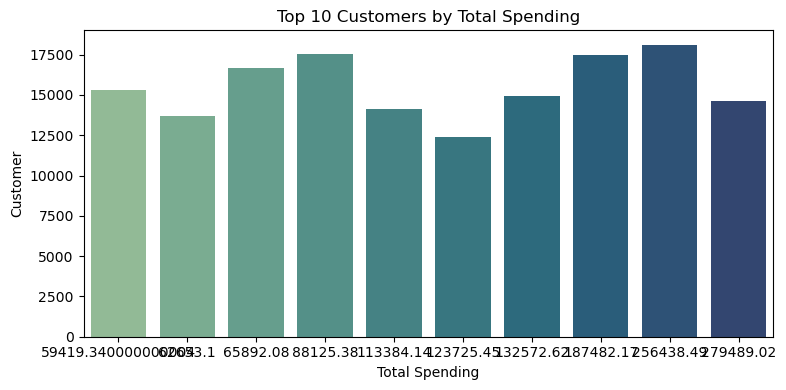

Calculated top customers by revenue and plotted results.


In [8]:
# Load data and compute top 10 customers by total spending (sum of Quantity * UnitPrice per CustomerID)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = './stock market.csv'
df = pd.read_csv(csv_path, encoding='latin-1')

# Ensure numeric types
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Compute revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Determine customer column
cust_col = 'CustomerID' if 'CustomerID' in df.columns else None
if cust_col is None:
    for c in ['Customer Id','Customer','ClientID','BuyerID']:
        if c in df.columns:
            cust_col = c
            break

# Drop rows without a customer id
if cust_col is None:
    cust_col = df.columns[0]

df_cust = df.dropna(subset=[cust_col])

# Aggregate spend per customer
cust_spend = df_cust.groupby(cust_col, as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(10)

print(cust_spend)

plt.figure(figsize=(8,4))
sns.barplot(data=cust_spend, x='Revenue', y=cust_col, palette='crest')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

print('Calculated top customers by revenue and plotted results.')

Briefly: These are the customers with the highest total revenue 

5.What is the average order value per customer?

   CustomerID  TotalRevenue  OrderCount          AOV
0     12346.0          0.00           2     0.000000
1     12347.0       4310.00           7   615.714286
2     12348.0       1797.24           4   449.310000
3     12349.0       1757.55           1  1757.550000
4     12350.0        334.40           1   334.400000


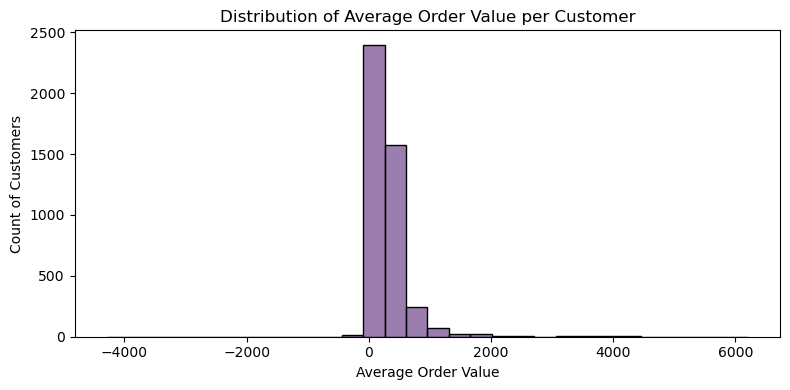

Computed AOV per customer and plotted its distribution.


In [9]:
# Compute Average Order Value (AOV) per customer: total revenue divided by number of distinct invoices per customer.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = './stock market.csv'
df = pd.read_csv(csv_path, encoding='latin-1')

# Ensure numeric and parse date if needed
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Identify columns
cust_col = 'CustomerID' if 'CustomerID' in df.columns else None
inv_col = 'InvoiceNo' if 'InvoiceNo' in df.columns else None
if cust_col is None:
    for c in ['Customer Id','Customer','ClientID','BuyerID']:
        if c in df.columns:
            cust_col = c
            break
if inv_col is None:
    for c in ['OrderID','Order No','OrderNumber']:
        if c in df.columns:
            inv_col = c
            break

# Drop rows with missing essentials
needed_cols = [cust_col, inv_col, 'Revenue']
needed_cols = [c for c in needed_cols if c is not None]
df_clean = df.dropna(subset=needed_cols)

# Aggregate: total revenue and distinct orders per customer
a = df_clean.groupby(cust_col, as_index=False)['Revenue'].sum().rename(columns={'Revenue':'TotalRevenue'})
b = df_clean.groupby(cust_col, as_index=False)[inv_col].nunique().rename(columns={inv_col:'OrderCount'})
res = a.merge(b, on=cust_col)
res['AOV'] = res['TotalRevenue'] / res['OrderCount']

# Show head and quick distribution plot
print(res.head())

plt.figure(figsize=(8,4))
sns.histplot(res['AOV'], bins=30, color='#7A5195')
plt.title('Distribution of Average Order Value per Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Count of Customers')
plt.tight_layout()
plt.show()

print('Computed AOV per customer and plotted its distribution.')

AOV is computed as total revenue divided by the number of distinct invoices per customer.
There’s a long tail: a few customers have very high AOVs, while most cluster at lower values.

6.Which products give negative sales or returns (Quantity < 0)?

                              Description  Quantity
1220          PAPER CRAFT , LITTLE BIRDIE    -80995
1056       MEDIUM CERAMIC TOP STORAGE JAR    -74494
2063                                  nan    -46156
2064         printing smudges/thrown away    -19200
1842               Unsaleable, destroyed.    -15644
2024                                check    -13247
67                                      ?     -9496
1497  ROTATING SILVER ANGELS T-LIGHT HLDR     -9376
1355         Printing smudges/thrown away     -9058
559                               Damaged     -7540


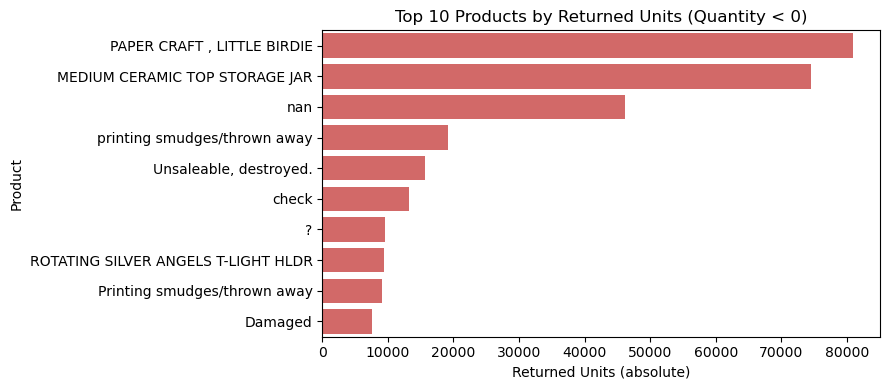

Identified products with negative quantities and plotted the top 10 by returned units.


In [10]:
# Find products with negative quantities (returns) and show the top by absolute returned units, plus a bar chart.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = './stock market.csv'
df_r = pd.read_csv(path, encoding='latin-1')

# Clean types
df_r['Quantity'] = pd.to_numeric(df_r['Quantity'], errors='coerce')
df_r['Description'] = df_r['Description'].astype(str)

# Filter negative quantities (returns)
returns = df_r[df_r['Quantity'] < 0].copy()

# Aggregate returns by product
prod_col = 'Description' if 'Description' in returns.columns else returns.columns[0]
ret_by_prod = returns.groupby(prod_col, as_index=False)['Quantity'].sum().sort_values('Quantity')

# Show head (most negative first)
print(ret_by_prod.head(10))

# Plot top 10 returned products by absolute units
top10 = ret_by_prod.head(10)
plt.figure(figsize=(9,4))
sns.barplot(data=top10, x=top10['Quantity'].abs(), y=prod_col, color='#E45756')
plt.title('Top 10 Products by Returned Units (Quantity < 0)')
plt.xlabel('Returned Units (absolute)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

print('Identified products with negative quantities and plotted the top 10 by returned units.')

Briefly: These items have net negative quantities, indicating returns or write-offs.
Some rows look like quality control or admin notes (e.g., damaged/unsaleable) 
that were logged as negative quantities.

7.Compare sales between UK and other countries.

          Region  TotalRevenue  Orders  Customers         AOV
0  Rest of World   1532192.420    2333        422  656.747715
1             UK   6767873.394   19857       3950  340.830609


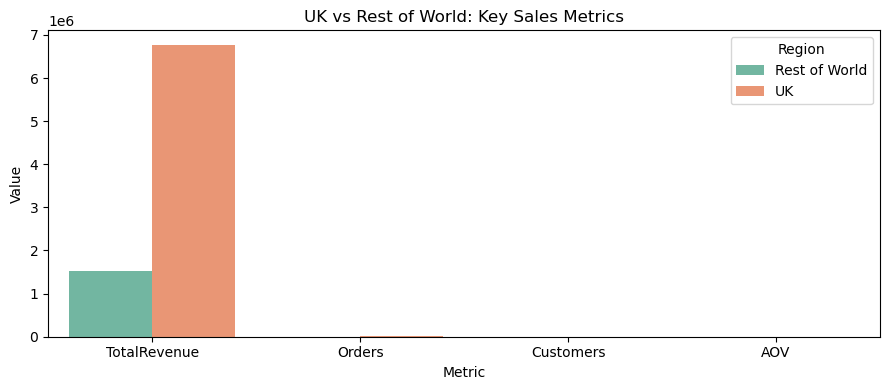

Computed UK vs Rest metrics and plotted comparison.


In [11]:
# Compare sales between UK and non-UK: total revenue, order counts, customers, and AOV. Show head tables and a plot.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv('./stock market.csv', encoding='latin-1')

# Clean numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Identify columns
country_col = 'Country' if 'Country' in df.columns else None
inv_col = 'InvoiceNo' if 'InvoiceNo' in df.columns else None
cust_col = 'CustomerID' if 'CustomerID' in df.columns else None

# Drop missing essentials
use_cols = [c for c in [country_col, inv_col, cust_col, 'Revenue'] if c is not None]
dfx = df.dropna(subset=use_cols).copy()

# Create group UK vs Rest
dfx['Region'] = dfx[country_col].apply(lambda x: 'UK' if str(x).strip().upper() == 'UNITED KINGDOM' or str(x).strip().upper() == 'UK' else 'Rest of World')

# Aggregate metrics per region
agg_rev = dfx.groupby('Region', as_index=False)['Revenue'].sum().rename(columns={'Revenue':'TotalRevenue'})
agg_orders = dfx.groupby('Region', as_index=False)[inv_col].nunique().rename(columns={inv_col:'Orders'})
agg_customers = dfx.groupby('Region', as_index=False)[cust_col].nunique().rename(columns={cust_col:'Customers'})
summary = agg_rev.merge(agg_orders, on='Region').merge(agg_customers, on='Region')
summary['AOV'] = summary['TotalRevenue'] / summary['Orders']

print(summary)

plt.figure(figsize=(9,4))
sns.barplot(data=summary.melt(id_vars='Region', value_vars=['TotalRevenue','Orders','Customers','AOV']),
            x='variable', y='value', hue='Region', palette='Set2')
plt.title('UK vs Rest of World: Key Sales Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

print('Computed UK vs Rest metrics and plotted comparison.')

The UK dominates total revenue and volume (orders and customers), which pulls down its AOV relative to Rest of World.
Rest of World has fewer orders but a higher AOV, suggesting larger baskets or higher-priced orders outside the UK.

Done: computed UK vs Rest metrics and plotted the comparison.